## NoteBook Objectives
In this notebook, I will be focusing on:

 - Build and train a multilayer perceptron (MLP) with Keras
 - Perform topic classification with neural networks

## My cousera certificate

https://www.coursera.org/account/accomplishments/certificate/C8NJGBGWYHDK

## Import Essential Libraries

In [1]:
# %tensorflow_version 2.x 
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
np.random.seed(0)
import tensorflow as tf
from tensorflow.keras.datasets import reuters
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation
from tensorflow.keras.preprocessing.text import Tokenizer

# print('Tensorflow version:', tf.__version__)

## Load the Reuters Dataset

In [2]:
# Split the reuters dataset into 80-20 percentage.
(x_train, y_train), (x_test, y_test) = reuters.load_data(num_words=10000, test_split=0.2)

/Users/imbilalbutt/python-virtual-environments/env/lib/python3.7/site-packages/tensorflow/python/keras/datasets/reuters.py:148: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
/Users/imbilalbutt/python-virtual-environments/env/lib/python3.7/site-packages/tensorflow/python/keras/datasets/reuters.py:149: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_test, y_test = np.array(xs[idx:]), np.array(labels[idx:])


In [3]:
print(len(x_train), 'train sequences')
print(len(x_test), 'test sequences')

8982 train sequences
2246 test sequences


In [4]:
# The number of distinct classes or labels in dataset.
num_classes = np.max(y_train) + 1
print(num_classes, 'classes')

46 classes


## Vectorize Sequence Data and One-hot Encode Class Labels

In [5]:
print('Vectorizing sequence data...')
tokenizer = Tokenizer(num_words=10000)
x_train = tokenizer.sequences_to_matrix(x_train, mode='binary')
x_test = tokenizer.sequences_to_matrix(x_test, mode='binary')
print('x_train shape:', x_train.shape)
print('x_test shape:', x_test.shape)

Vectorizing sequence data...
x_train shape: (8982, 10000)
x_test shape: (2246, 10000)


In [6]:
print('Convert class vector to binary class matrix for use with categorical_crossentropy')
y_train = tf.keras.utils.to_categorical(y_train, num_classes)
y_test = tf.keras.utils.to_categorical(y_test, num_classes)
print('y_train shape:', y_train.shape)
print('y_test shape:', y_test.shape)

Convert class vector to binary class matrix for use with categorical_crossentropy
y_train shape: (8982, 46)
y_test shape: (2246, 46)


## Build Multilayer Perceptron Model

In [7]:
model = Sequential()
model.add(Dense(512, input_shape=(10000,)))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes))
model.add(Activation('softmax'))

In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 512)               5120512   
_________________________________________________________________
activation (Activation)      (None, 512)               0         
_________________________________________________________________
dropout (Dropout)            (None, 512)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 46)                23598     
_________________________________________________________________
activation_1 (Activation)    (None, 46)                0         
Total params: 5,144,110
Trainable params: 5,144,110
Non-trainable params: 0
_________________________________________________________________


## Train Model

In [9]:
%%time
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

# Let's add early stopping only for 3 epochs. Meaning if in 3 epochs if error loss does not changes
# stop the training.
early_stopping = EarlyStopping(monitor='val_loss',patience=3, verbose=1, mode='min', baseline=None, 
                               restore_best_weights=False)
callbacks = [early_stopping]

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

CPU times: user 9.58 ms, sys: 1.8 ms, total: 11.4 ms
Wall time: 9.57 ms


In [10]:
history = model.fit(x_train, y_train,
                    epochs=20,
                    batch_size=32,
                    validation_split=0.1,
                    callbacks=callbacks)

Epoch 1/20
253/253 [==============================] - 5s 20ms/step - loss: 1.2897 - accuracy: 0.7247 - val_loss: 0.9351 - val_accuracy: 0.7987
Epoch 2/20
253/253 [==============================] - 5s 20ms/step - loss: 0.4944 - accuracy: 0.8895 - val_loss: 0.8675 - val_accuracy: 0.8087
Epoch 3/20
253/253 [==============================] - 5s 20ms/step - loss: 0.2817 - accuracy: 0.9346 - val_loss: 0.8639 - val_accuracy: 0.8120
Epoch 4/20
253/253 [==============================] - 5s 20ms/step - loss: 0.2196 - accuracy: 0.9510 - val_loss: 0.9326 - val_accuracy: 0.8142
Epoch 5/20
253/253 [==============================] - 5s 20ms/step - loss: 0.1916 - accuracy: 0.9541 - val_loss: 0.9613 - val_accuracy: 0.8031
Epoch 6/20
253/253 [==============================] - 5s 20ms/step - loss: 0.1940 - accuracy: 0.9534 - val_loss: 0.9720 - val_accuracy: 0.8042
Epoch 00006: early stopping


## Evaluate Model on Test Data

In [11]:
score = model.evaluate(x_test, y_test, batch_size=32, verbose=1)
print('Test loss: {:4f}\nTest Accuracy: {:4f}'.format(score[0], score[1]))

71/71 [==============================] - 0s 4ms/step - loss: 0.9767 - accuracy: 0.7988
Test loss: 0.976744
Test Accuracy: 0.798753


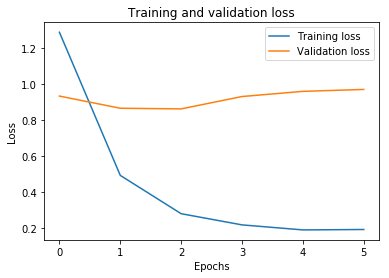

In [12]:
# Visualize the training and validation loss.
plt.plot(history.history['loss'], label='Training loss')
plt.plot(history.history['val_loss'], label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

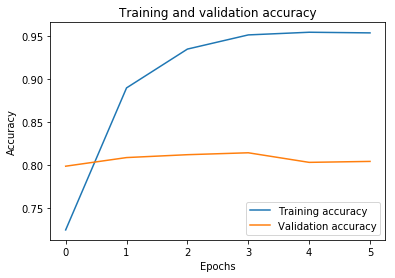

In [13]:
# Visualize the training and validation accuracy.
plt.plot(history.history['accuracy'], label='Training accuracy')
plt.plot(history.history['val_accuracy'], label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()